In [ ]:
# import pandas as pd
import numpy as np
import csv

from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
def removeGravity (columns):
    g = 0
    col = columns - (0.9 * g + 0.1 * columns)
    return col

In [3]:
def normalization(columns):
    MinMax = (columns - columns.min(axis=0)) / (columns.max(axis=0) - columns.min(axis=0))
    MinMax = (MinMax * 2) - 1
    MinMax
    return MinMax

In [4]:
def print_graph(MinMax, num): # num is cut range
    length = len(MinMax)
    plt.figure(figsize=(20, 5)) # graph size
    plt.xticks(np.arange(0, length+1, num))
    plt.plot(MinMax)
    plt.show()

In [5]:
def cut_count(MinMax, num, cnt):
    count = int((len(MinMax)-num) / cnt)
    step = []
    temp = 0
    for i in range(0, count):
        temp = num+i*cnt
        step.append(MinMax[temp:temp+cnt])
    return step

In [6]:
def ACF(step, cnt): #자기상관계수 구하는 함수 cnt = 
    answer = 0
    acf = []
    for i in step:
        answer = 0
#         answer = np.linalg.norm(i)
        for j in i:
#             print(j)
            answer = answer + j*j
        answer = answer / cnt
#         print(answer)
        acf.append(answer)
    return acf

In [7]:
def compare_acf(acf):
    num = len(acf) / 2
    left = []
    right = []
    result = []
    for i in range(1, len(acf), +2):
        left.append(acf[i])
        right.append(acf[i-1])
        
    result = np.corrcoef(left, right)
    result = abs(result)
#     print (result)
    return result

In [30]:
def seperate_z(x) :
    if (x < 0.2):
        return True
    else : return False

In [26]:
def gait_analysis(columns, i) :
    col = removeGravity(columns)
    MinMax = normalization(col)
#     MinMax_x = MinMax['AccX']
#     MinMax_y = MinMax['AccY']
#     MinMax_z = MinMax['AccZ']
    MinMax_x = MinMax['AccX']
    MinMax_y = MinMax['AccY']
    MinMax_z = MinMax['AccZ']
    
    step_x = cut_count(MinMax_x, 0, 50)
    step_y = cut_count(MinMax_y, 0, 50)
    step_z = cut_count(MinMax_z, 0, 50)
    
    acf_x = ACF(step_x, 50)
    acf_y = ACF(step_y, 50)
    acf_z = ACF(step_z, 50)
    
#     compare_x = compare_acf(acf_x)
    compare_y = compare_acf(acf_y)
#     compare_z = compare_acf(compare_y[0])
#     print(compare_x, compare_y, compare_z)
    result = seperate_z(compare_y[0][1])
#     x = np.array([compare_x, compare_y, compare_z])
    
#     result = seperate_z(np.linalg.norm(x))
#     f = open("result_abnormal.csv", 'a', newline='')
#     wr = csv.writer(f)
#     wr.writerow([i, result, compare_x, compare_y, compare_z])
    
#     f.close()
    if (result == True):
        print('\033[34m', result, '\033[0m', compare_y[0][1])
    else : print('\033[31m', result, '\033[0m', compare_y[0][1])
    

In [10]:
np.corrcoef([1, 5, 3], [2, 1, 9])

array([[ 1.        , -0.11470787],
       [-0.11470787,  1.        ]])

In [31]:
for i in range(0, 10):
    df = pd.read_csv(f'normal/normalWalk{i}.csv')
    columns = df[['AccX', 'AccY', 'AccZ']]
    gait_analysis(columns, i)
#     print(y[0][1])
#     if (y[0][1] < 0.2) :
#         print(True)
#     else : print(False)

# df = pd.read_csv('normal/normalWalk0.csv')
# columns = df[['AccX', 'AccY', 'AccZ']]
# gait_analysis(columns, i)

 True  0.04797625682527628
 False  0.26358104633156937
 True  0.18480034900392275
 False  0.2926040004364926
 True  0.038147270918891904
 False  0.34401898419888155
 True  0.07316490052816124
 True  0.12424617406490203
 True  0.0045748997665985966
 True  0.10690723522025575


In [32]:
for i in range(0, 10):
    df = pd.read_csv(f'abnormal/abnormalWalk{i}.csv')
    columns = df[['AccX', 'AccY', 'AccZ']]
    gait_analysis(columns, i)
#     print(y[0][1])
#     if (y[0][1] < 0.2) :
#         print(True)
#     else : print(False)

# df = pd.read_csv('abnormal/abnormalWalk0.csv')
# columns = df[['AccX', 'AccY', 'AccZ']]
# gait_analysis(columns, i)

 False  0.22330281227376156
 True  0.055491844057420234
 False  0.21453965046621365
 True  0.012088704049183777
 True  0.14028878164779104
 False  0.35273333375481
 True  0.16520250142741266
 True  0.06486007281321797
 True  0.11032123683868277
 False  0.23674760255864066


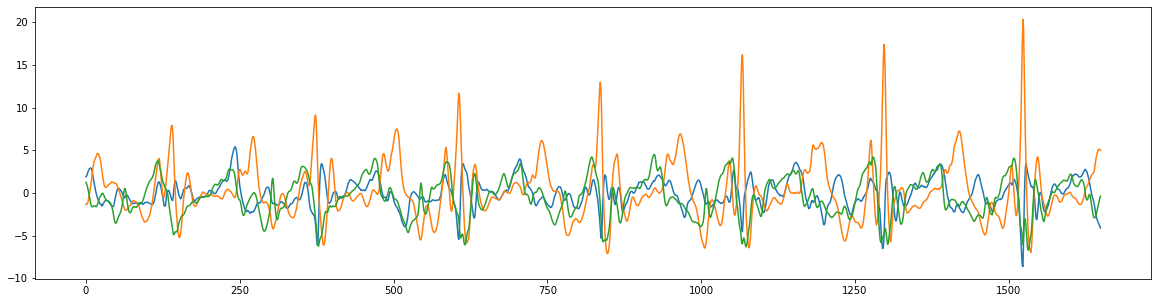

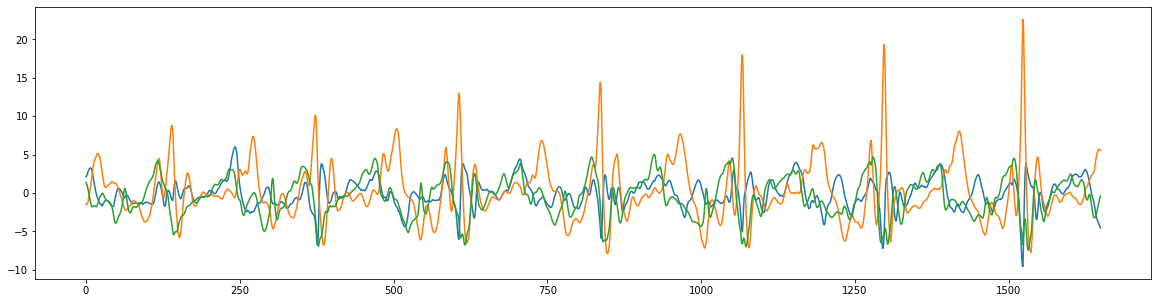

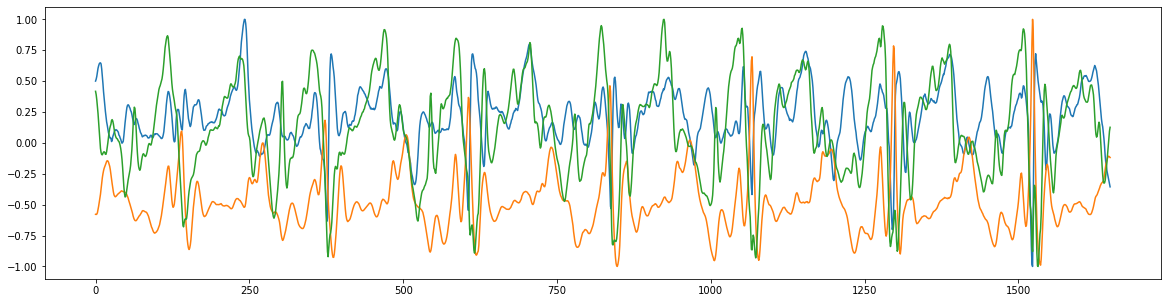

In [34]:
df = pd.read_csv('abnormal/abnormalWalk0.csv')
columns = df[['AccX', 'AccY', 'AccZ']]
col = removeGravity(columns)
print_graph(col, 250)
print_graph(columns, 250)
MinMax = normalization(columns)
print_graph(MinMax, 250)

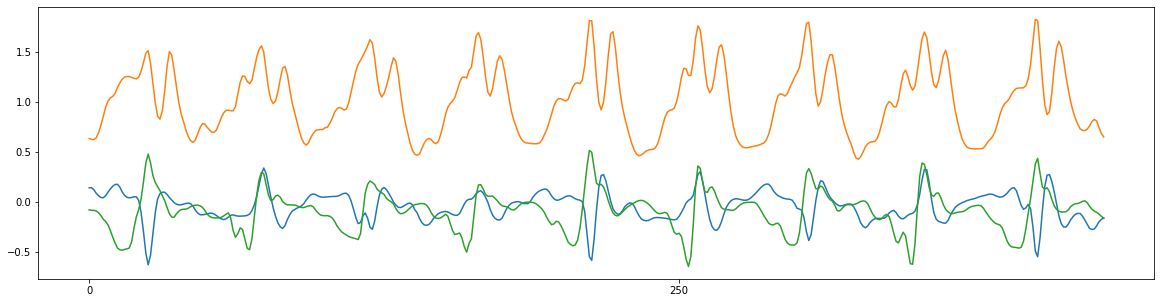

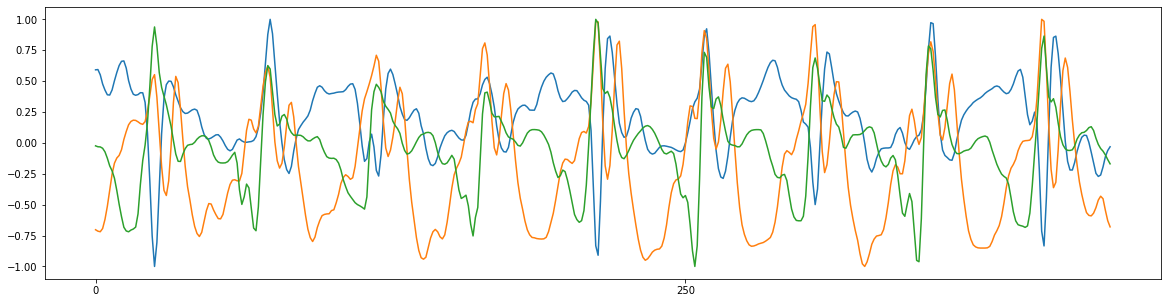

In [33]:
df = pd.read_csv('Walk1/T0_ID000104_Walk1.csv')
columns = df[['accel_x', 'accel_y', 'accel_z']]
print_graph(columns, 250)
MinMax = normalization(columns)
print_graph(MinMax, 250)

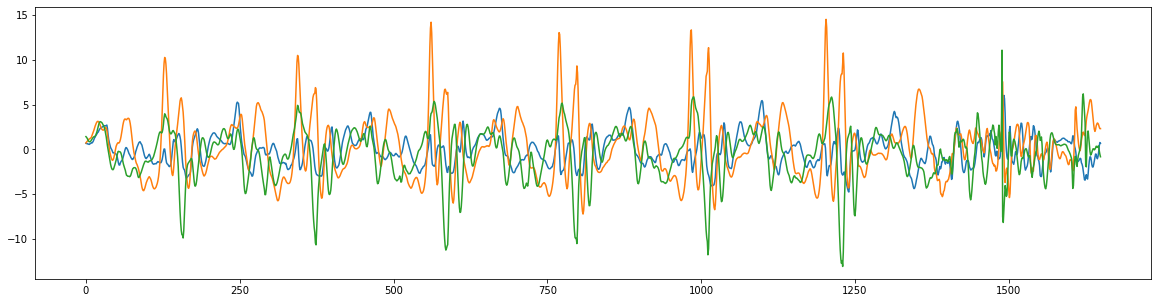

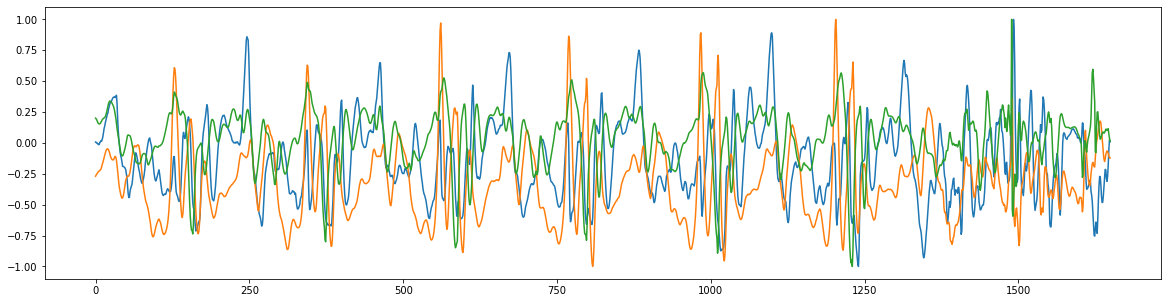

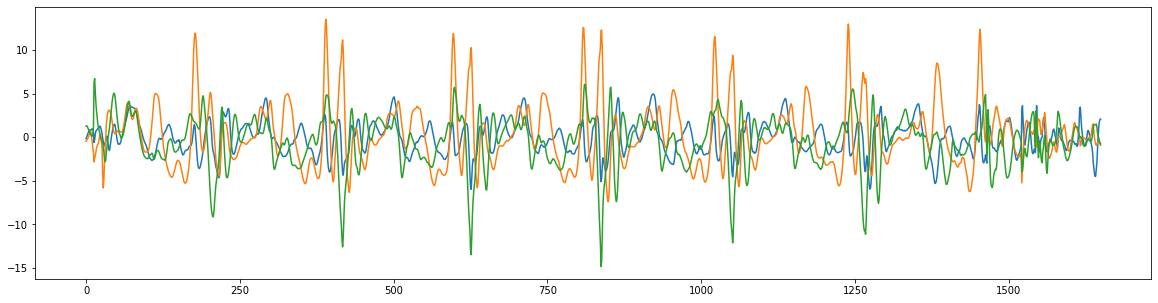

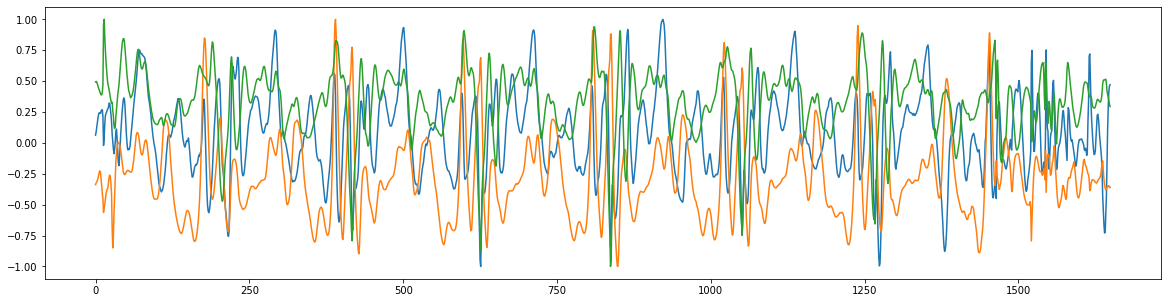

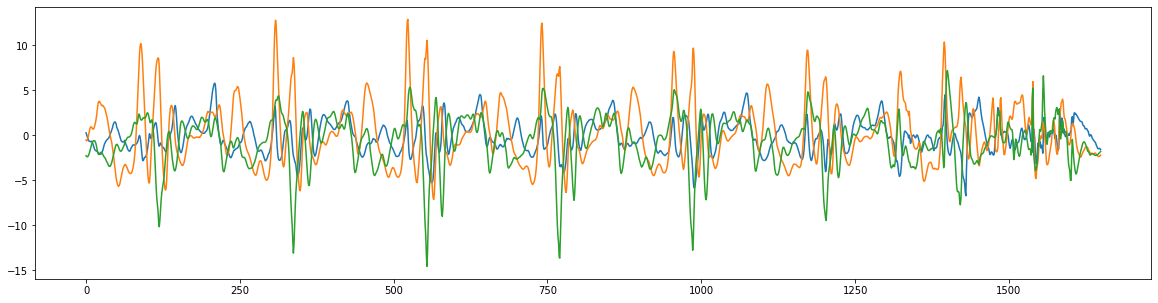

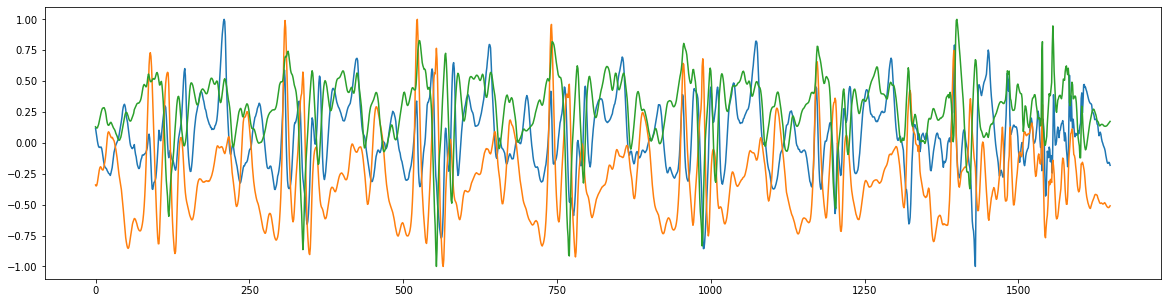

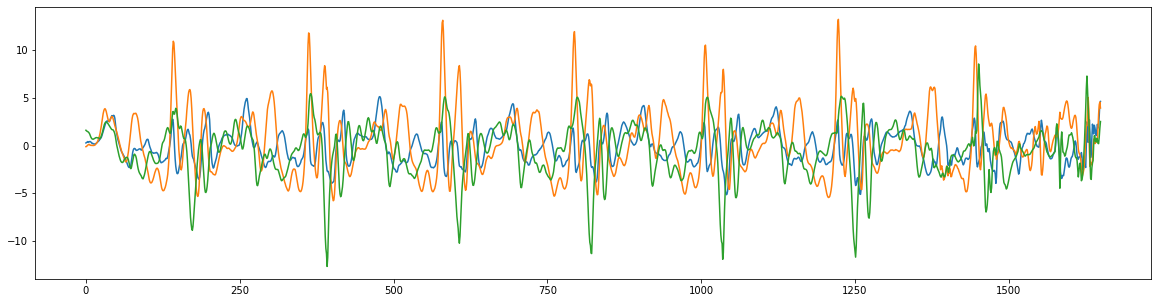

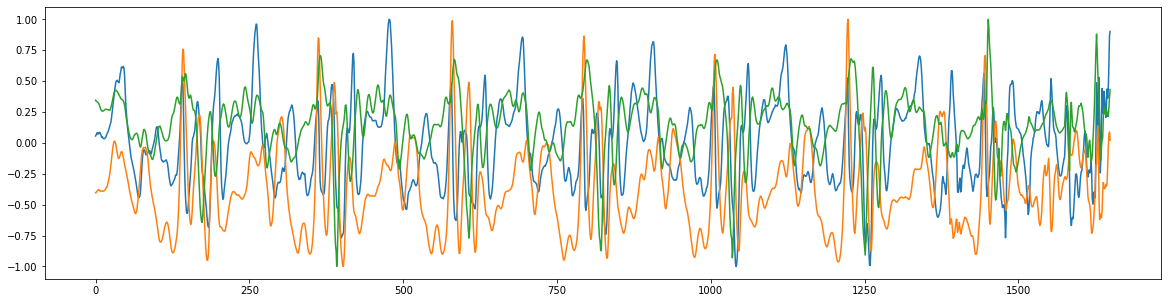

In [63]:
for i in range(2, 6):
    df = pd.read_csv(f'normal/normalWalk{i}.csv')
    columns = df[['AccX', 'AccY', 'AccZ']]
    col = removeGravity(columns)
    print_graph(col, 250)
    MinMax = normalization(columns)
    print_graph(MinMax, 250)